## IMLEMENTING CLASSIFICATION USING K-NN ALGORITHM

## Load the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,\
precision_score,recall_score,f1_score
plt.style.use("ggplot")

## Load the dataset

In [2]:
df = pd.read_csv("diabetes.csv")

## Expolring the dataset

In [3]:
# Print first 5 rows

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Let's observe the shape of the dataframe

df.shape

(768, 9)

In [5]:
# Number of rows in dataframe = 768
# Number of columns in dataframe = 9

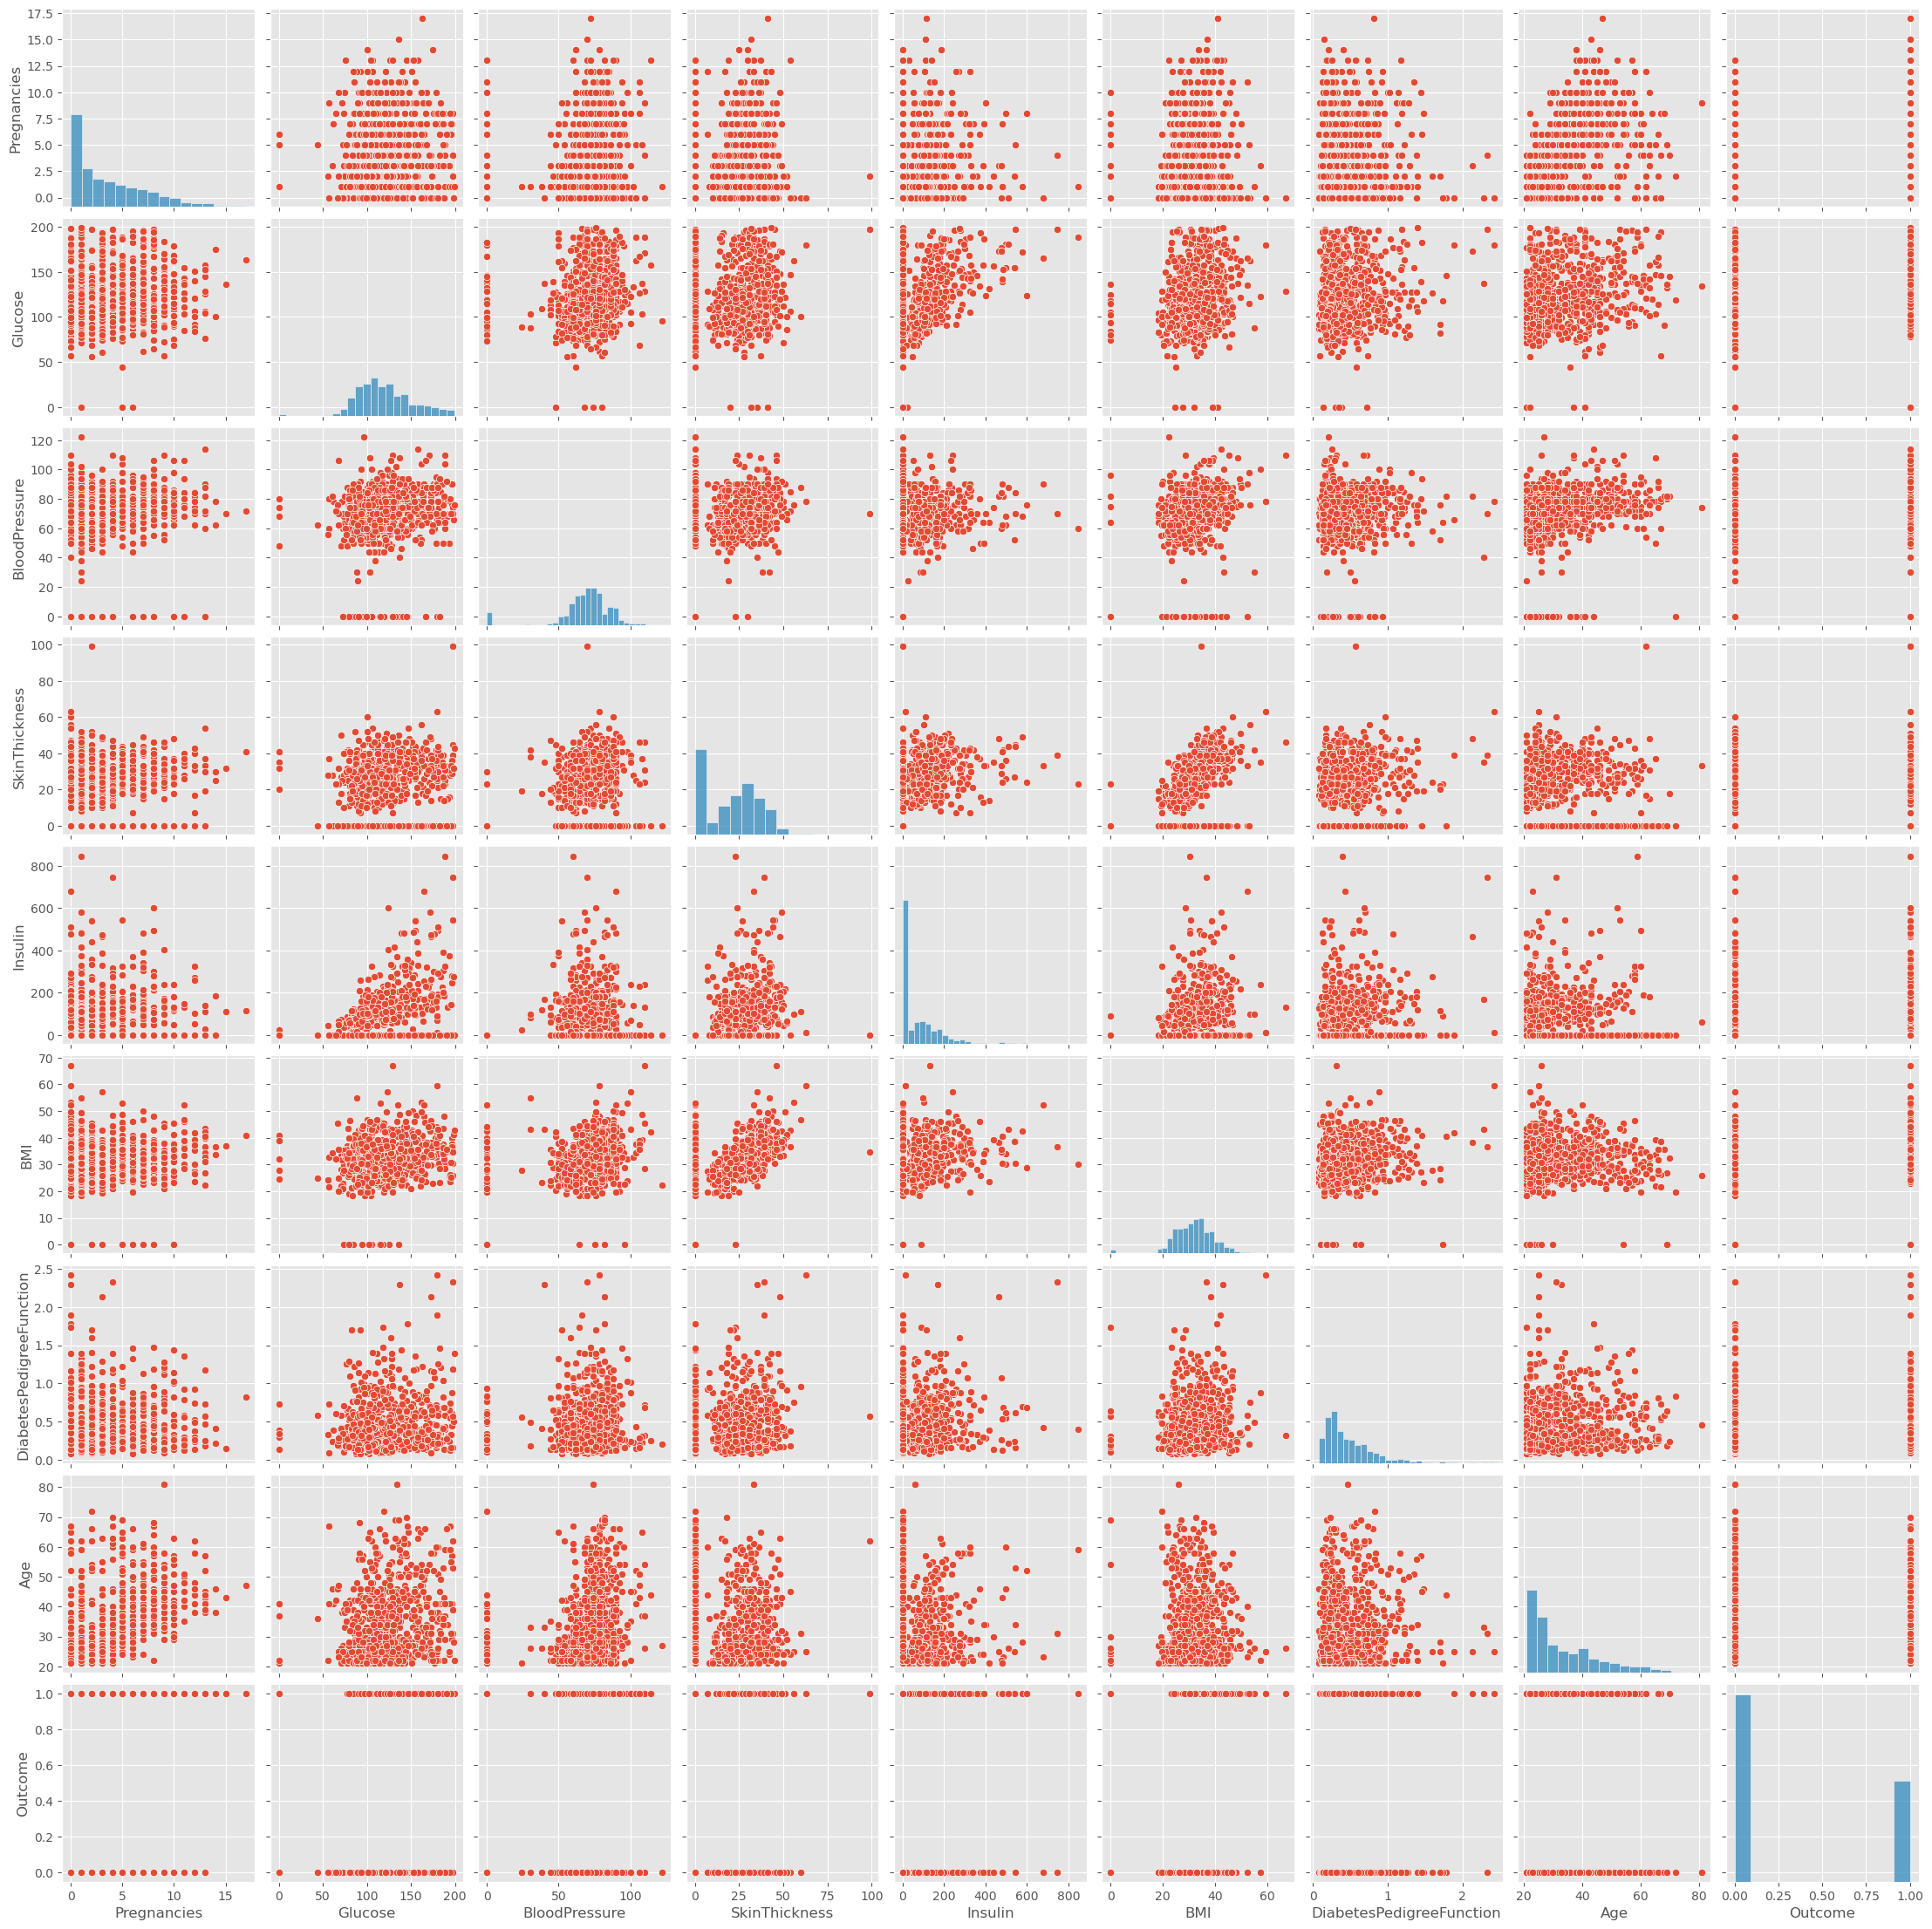

In [6]:
# Let's observe data visually

sns.pairplot(df)

In [7]:
## Let's observe correlation 

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
# Traget column: Outcome
#       classes: 1. 0 - Non-diabetic
#                2. 1 - Diabetic

# Features (Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age)

## Extracting Feature array and Target column

In [9]:
X = df.drop(columns="Outcome")
y = df['Outcome']

In [10]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Splitting dataframe into Training & Testing sets

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
print("Length of X: ", len(X))
print("Length of X_train: ", len(X_train))
print("Length of X_test: ", len(X_test))

Length of X:  768
Length of X_train:  576
Length of X_test:  192


## Creating Classifier

In [14]:
# Let's create K-NN Classifier using 5 Neighbours

classifier = KNeighborsClassifier(n_neighbors=5)

# Training the classifier

classifier.fit(X_train,y_train)

KNeighborsClassifier()

## Making Predictions using classifier

In [15]:
y_pred = classifier.predict(X_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

## Evaluation Classifier

In [16]:
# Let's print the accuracy score of classifier

print(accuracy_score(y_test,y_pred))

0.65625


In [17]:
## Approx : 66%

## Creating Classifier again using K=6

In [23]:
# Let's create K-NN Classifier using 6 Neighbours

classifier = KNeighborsClassifier(n_neighbors=6)

# Training the classifier

classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [24]:
# Let's print the accuracy score of classifier

print(accuracy_score(y_test,y_pred))

0.65625


## Creating Classifier again using K=7

In [25]:
# Let's create K-NN Classifier using 7 Neighbours

classifier = KNeighborsClassifier(n_neighbors=7)

# Training the classifier

classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [26]:
# Let's print the accuracy score of classifier

print(accuracy_score(y_test,y_pred))

0.65625


## Creating Classifier again using K=8

In [27]:
# Let's create K-NN Classifier using 8 Neighbours

classifier = KNeighborsClassifier(n_neighbors=8)

# Training the classifier

classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [28]:
# Let's print the accuracy score of classifier

print(accuracy_score(y_test,y_pred))

0.65625


## Finding best fit K value

In [18]:
error_rate = [] # list taht will store the average error rate value of K

for i in range(1,31):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i = clf.predict(X_test)
    error_rate.append(np.mean(predict_i!=y_test))

print(error_rate)    

[0.3333333333333333, 0.2916666666666667, 0.359375, 0.3072916666666667, 0.34375, 0.3072916666666667, 0.3177083333333333, 0.2916666666666667, 0.2864583333333333, 0.28125, 0.3072916666666667, 0.2552083333333333, 0.2604166666666667, 0.265625, 0.2604166666666667, 0.2708333333333333, 0.2864583333333333, 0.2864583333333333, 0.2864583333333333, 0.2916666666666667, 0.296875, 0.3020833333333333, 0.3072916666666667, 0.2916666666666667, 0.296875, 0.28125, 0.2916666666666667, 0.28125, 0.2864583333333333, 0.2760416666666667]


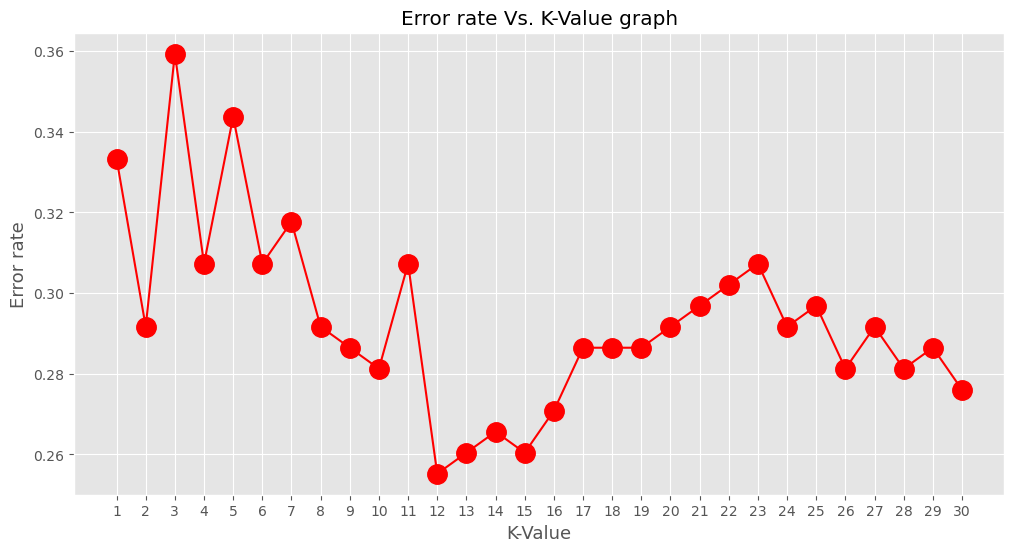

In [22]:
# Plotting the error rate vs k-graph

plt.figure(figsize=(12,6))
plt.plot(range(1,31), error_rate,marker="o",color="red",markersize=14)
plt.title("Error rate Vs. K-Value graph")
plt.xlabel("K-Value",fontsize=13)
plt.ylabel("Error rate",fontsize=13)
plt.xticks(range(1,31))
plt.show()

In [29]:
# Let's create K-NN Classifier using 12 Neighbours

classifier = KNeighborsClassifier(n_neighbors=12)

# Training the classifier

classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [30]:
# Let's print the accuracy score of classifier

print(accuracy_score(y_test,y_pred))

0.65625
